# Inferential Statistics Assignment

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/1uWH8kic9eW53I7BqNpgDKCz2hWYQSbIrI73q9JR_sag/export?format=csv'

### Read the customer churn data set into a Pandas data frame.

In [3]:
customer = pd.read_csv(data_url)

In [4]:
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   int64  
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   Contract          7032 non-null   object 
 9   PaperlessBilling  7032 non-null   int64  
 10  PaymentMethod     7032 non-null   object 
 11  MonthlyCharges    7032 non-null   float64
 12  TotalCharges      7032 non-null   float64
 13  Churn             7032 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 769.2+ KB


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,Male,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,0
2,2,Male,0,1,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,Male,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,Female,0,1,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1


### Generate a histogram that shows the data distribution of the MonthlyCharges field in the data.

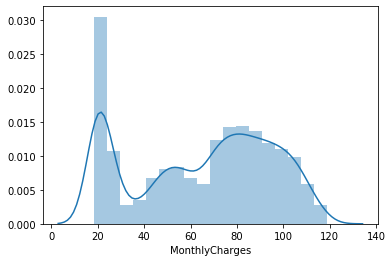

In [5]:
sns.distplot(customer.MonthlyCharges)
plt.show()

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the MonthlyCharges field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [6]:
mean = customer.MonthlyCharges.sample(n=1000, replace=True).mean()
mean

64.37085

### Bootstrap a sampling distribution for MonthlyCharges field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

In [ ]:
sample_size_1 = 1000
n_samples_1 = 1000
sample_size_2 = len(customer.index)
n_samples_2 = 5000
sample_means_1 = []
sample_means_2 = []

for _ in range(n_samples_1):
    sample_mean = customer.MonthlyCharges.sample(sample_size_1,replace=True).mean()
    sample_means_1.append(sample_mean)
    
for _ in range(n_samples_2):
    sample_mean = customer.MonthlyCharges.sample(sample_size_2, replace=True).mean()
    sample_means_2.append(sample_mean)
    



In [ ]:
sns.distplot(sample_means_1, fit=stats.norm)
plt.show()
sns.distplot(sample_means_2, fit=stats.norm)
plt.show()

In [ ]:
customer.MonthlyCharges.min()

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of churn rates that may have resulted in the observed amount of churn we see in the data.

In [ ]:
customer.head()

In [ ]:
obs_n_churned = customer.Churn.sum()
n_cust = customer['CustomerID'].nunique()
obs_rate = customer.Churn.mean()

In [ ]:
print(obs_n_churned)
print(n_cust)
print(obs_rate)

In [ ]:
# uninformed prior
valid_rates = []

for _ in range(100000):
    # prior
    rate = np.random.beta(1,1)
    
    # Generative process
    gen_n_churn = np.random.binomial(n_cust, rate)

    if gen_n_churn == obs_n_churned:
        valid_rates.append(rate)
        # print(gen_n_churn)

sns.distplot(valid_rates)
plt.show()

In [ ]:
# print(valid_rates)
# print(rate)
# print(obs_n_churned)
# print(gen_n_churn)

In [ ]:
alpha = 2.5
beta = 1

sns.distplot(np.random.beta(alpha, beta, 100000))
plt.show()

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
valid_rates = []
alpha = 1.5
beta = 1

for _ in tqdm(range(1000000)):
    # prior
    rate = np.random.beta(alpha,beta)
    
    # Generative process
    gen_n_churn = np.random.binomial(n_cust, rate)

    if gen_n_churn == obs_n_churned:
        valid_rates.append(rate)
        #print(gen_n_churn)

sns.distplot(valid_rates)
plt.show()
